In [62]:
import os
import pandas as pd
import numpy as np

frames = []

for root, dirs, files in os.walk('../data/'):
    for f in files:
        if f.endswith(".csv"):
            file_path = os.path.join(root, f)
            dataframe = pd.read_csv(file_path)
            dataframe.columns = dataframe.columns.str.replace('\t', '')
            frames.append(dataframe)

data = pd.concat(frames, sort=False)[['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Utility_Increase']]
data.head()

,Optimal_Affected_Component,Optimal_Failure,Optimal_Utility_Increase
0,Query Service,CF1,49.5
1,User Management Service,CF2,16.0
2,Authentication Service,CF3,31.5
3,Bid and Buy Service,CF3,25.0
4,Item Management Service,CF3,16.0


In [4]:
total = len(data.index)
groups = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).ngroups

print('We have ' + str(groups) + ' unqiue combinations of <component, failre> and at total ' + str(total) + ' data points.')

We have 71 unqiue combinations of <component, failre> and at total 10928 data points.


# Task 1: Plot the distribution 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71]), <a list of 71 Text xticklabel objects>)

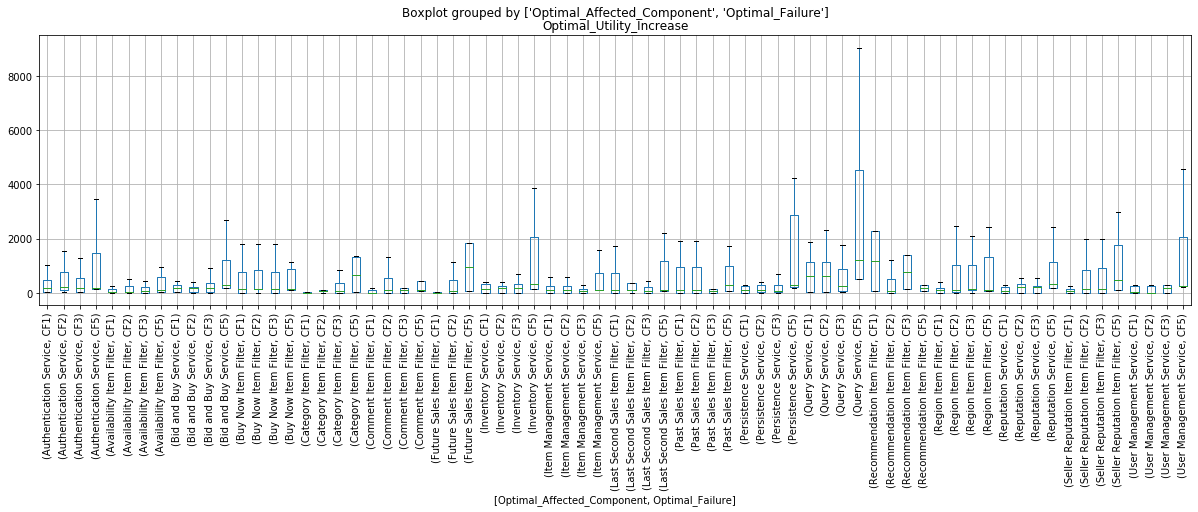

In [63]:
import matplotlib.pyplot as plt
data.boxplot(by=['Optimal_Affected_Component', 'Optimal_Failure'], figsize=(20,5), showfliers=False)
plt.xticks(rotation='vertical')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eb41590>]],
      dtype=object)

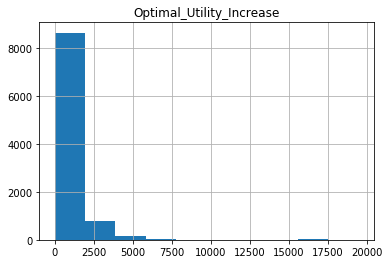

In [64]:
data.hist()

# Task 2: Compute statistics

* mean = average of the numbers
* median = separating the higher half from the lower half
* mode = the value that appears most often, it can be multiple values
* std = standard deviation
* skew = skewness, measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* kurtosis = measure of the "tailedness" of the probability distribution of a real-valued random variable

## Mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f2fcf50>]],
      dtype=object)

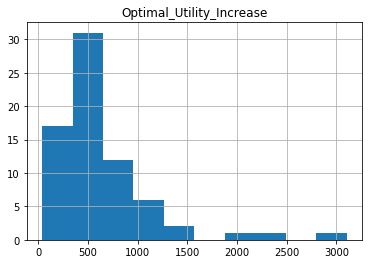

In [84]:
mean_values = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('mean')
mean_values.hist()

In [85]:
# get the outliers
mean_group = mean_values.apply(lambda x: x)
mean_group[mean_group.Optimal_Utility_Increase > 1700]

Optimal_Utility_Increase
Optimal_Affected_Component Optimal_Failure                          
Query Service              CF1                           2219.978165
                           CF2                           2087.293458
                           CF5                           3102.656684

## Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e8adc10>]],
      dtype=object)

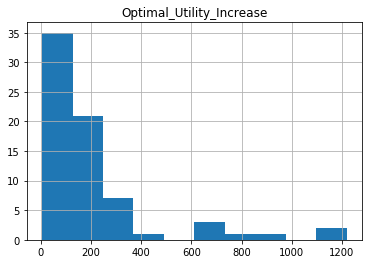

In [86]:
median = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('median')
median.hist()

In [87]:
# get the outliers
group = median.apply(lambda x: x)
group[group.Optimal_Utility_Increase > 600]

Optimal_Utility_Increase
Optimal_Affected_Component Optimal_Failure                          
Category Item Filter       CF5                            665.719122
Future Sales Item Filter   CF5                            960.823229
Query Service              CF1                            616.342395
                           CF2                            638.460292
                           CF5                           1218.511276
Recommendation Item Filter CF1                           1190.805189
                           CF3                            769.139019

## Mode

(array([73.,  3.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([   5.      ,  233.793025,  462.58605 ,  691.379075,  920.1721  ,
        1148.965125, 1377.75815 , 1606.551175, 1835.3442  , 2064.137225,
        2292.93025 ]),
 <a list of 10 Patch objects>)

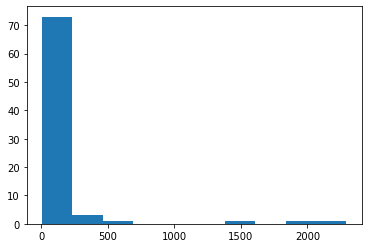

In [95]:
import operator
import functools

mode = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg(pd.Series.mode)
mode_values = mode['Optimal_Utility_Increase'].values
mode_flatten = np.hstack(mode_values).tolist()

plt.hist(mode_flatten)

In [104]:
# get the outliers
mode_group = mode.apply(lambda x: x)
high_values = []
for index, row in mode_group.iterrows():
    if isinstance(row['Optimal_Utility_Increase'], numpy.ndarray):
        for value in row['Optimal_Utility_Increase']:
            if value >= 400:
                high_values.append([str(index), value])
    else:
        if row['Optimal_Utility_Increase'] >= 400:
            high_values.append([str(index), row['Optimal_Utility_Increase']])

print('Outliers:')
for value in high_values:
    print(value)

Outliers:
["('Future Sales Item Filter', 'CF5')", 1850.09346]
["('Query Service', 'CF5')", 498.2634396000001]
["('Recommendation Item Filter', 'CF1')", 2292.93025]
["('Recommendation Item Filter', 'CF3')", 1405.2578449999999]


## standard deviation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21404290>]],
      dtype=object)

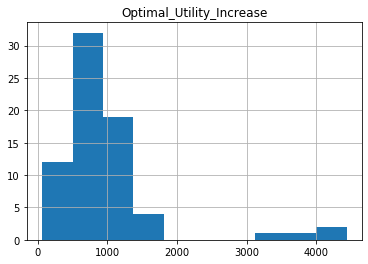

In [105]:
std = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('std')
std.hist()

In [106]:
# get the outliers
std_group = std.apply(lambda x: x)
std_group[std_group.Optimal_Utility_Increase > 2000]

Optimal_Utility_Increase
Optimal_Affected_Component Optimal_Failure                          
Query Service              CF1                           4433.458518
                           CF2                           4227.087309
                           CF3                           3683.953364
                           CF5                           3549.914299

## skewness
measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

In [113]:
values = data['Optimal_Utility_Increase']
values.skew()

6.032647808507236

In [123]:
# we have positive skewed data
(values.mode() < values.median()) & (values.median() < values.mean())

0    True
dtype: bool

## kurtosis
measure of the "tailedness" of the probability distribution of a real-valued random variable

In [125]:
kurtosis = values.kurt()
kurtosis

54.486171831279975

In [126]:
# having leptokurtical data
exzess = kurtosis - 3
exzess > 0

True

# Result:

* The combination of <Query Service,CF5> shows particular high values
* We have a positive skewness, that increases the probability to get a lower value compared to the average.
* We have leptokurtical data what means that the values are distributed over a small range.